In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [ ]:
digit_dataset = load_digits()

In [ ]:
dir(digit_dataset)

In [ ]:
from sklearn.model_selection import train_test_split

# Everytime we call this split function we get different test and train dataset.
# Hence, performace will also change everytime
x_train, x_test, y_train, y_test = train_test_split(digit_dataset.data, digit_dataset.target, test_size=0.3)

In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

In [ ]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

In [ ]:
## KFold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [ ]:
# Basic Example, here kf.split() return iterator 
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [74]:
# In day to day life programmer does not have to write all these code each time, instead cross_val_score can be used
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digit_dataset.data,digit_dataset.target):
    # Spliting train and test data
    x_train, x_test, y_train, y_test = digit_dataset.data[train_index], digit_dataset.data[test_index],\
                                       digit_dataset.target[train_index], digit_dataset.target[test_index]
    # Calculating model score for various model
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x_train, x_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), x_train, x_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), x_train, x_test, y_train, y_test))
        

In [75]:
scores_logistic

[0.9081081081081082,
 0.9508196721311475,
 0.8950276243093923,
 0.9111111111111111,
 0.9497206703910615,
 0.9664804469273743,
 0.9776536312849162,
 0.949438202247191,
 0.8587570621468926,
 0.9431818181818182]

In [76]:
scores_svm

[0.4486486486486487,
 0.5846994535519126,
 0.3812154696132597,
 0.43333333333333335,
 0.4748603351955307,
 0.4301675977653631,
 0.5195530726256983,
 0.5898876404494382,
 0.5649717514124294,
 0.4431818181818182]

In [77]:
scores_rf

[0.9081081081081082,
 0.9781420765027322,
 0.9447513812154696,
 0.9388888888888889,
 0.9441340782122905,
 0.9720670391061452,
 0.9720670391061452,
 0.9550561797752809,
 0.943502824858757,
 0.9431818181818182]

In [78]:
score_df = pd.DataFrame({"LR":scores_logistic, "SVM":scores_svm, "RF":scores_rf})

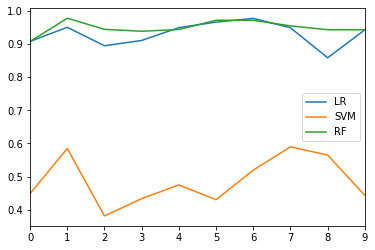

In [83]:
# Line chart to display best performing model
score_df.plot()

In [85]:
# cross_val_score function
from sklearn.model_selection import cross_val_score

In [118]:
LR_scores = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digit_dataset.data, digit_dataset.target,cv=4)

In [119]:
SVM_scores = cross_val_score(SVC(gamma='auto'), digit_dataset.data, digit_dataset.target,cv=4)

In [120]:
RF_scores = cross_val_score(RandomForestClassifier(n_estimators=50),digit_dataset.data, digit_dataset.target,cv=4)

In [121]:
# A parameter in RandomForestClassifier, n_estimators : integer, optional (default=10) The number of trees in the forest.

In [122]:
score_df = pd.DataFrame({"LR":LR_scores, "SVM":SVM_scores, "RF":RF_scores})

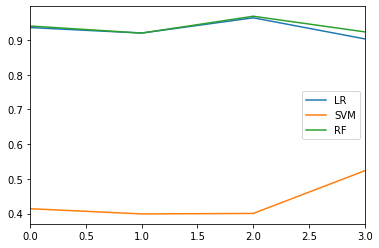

In [123]:
score_df.plot()